In [1]:
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from prettytable import PrettyTable
import sklearn
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the merged train and test dataset

train_data = pd.read_pickle('merged_train.pkl')
# test_data = pd.read_pickle('merged_test.pkl')

In [3]:
print("*"*45)
print("\n Train Data Shape : {} \n".format(train_data.shape))
# print("\n Test Data Shape : {} \n".format(test_data.shape))
print("*"*45)

*********************************************

 Train Data Shape : (590540, 434) 

*********************************************


## Utility Functions
<br>

In [4]:
def cat_num_features(df):
    
    '''
        Utility Function to get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', \
            'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', \
            'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', \
            'DeviceType', 'DeviceInfo']
    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)  

In [5]:
def label_encode(X_train, catf):
  
  '''
    Utility Function to Encode Categorical Features.
  '''

  for f in catf:
    
    X_train[f] = X_train[f].astype(str)
    
    le = LabelEncoder()
    le.fit(X_train[f])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    X_train[f] = le.transform(X_train[f])
    

  return (X_train)

## Data Preparation
<br>

### Splitting the Dataset
<br>

In [7]:
x = train_data.drop(['isFraud', 'TransactionID'], axis=1)
y = train_data['isFraud']

In [8]:
print("*"*45)
print("\n Train Data Shape : {} \n".format(x.shape))
print("*"*45)

*********************************************

 Train Data Shape : (590540, 432) 

*********************************************


In [9]:
# Storing Categorical and Numerical Feature Names 

catf, numf = cat_num_features(x)
categorical_feature_indices = [x.columns.get_loc(f) for f in catf]

In [10]:
x = label_encode(x, catf)

In [11]:
# Imputing the missing values of Categorical Columns with "missing"
x[catf] = x[catf].fillna('missing')


In [12]:
# Imputed and Normalized

x[numf] =x[numf].fillna(-999)
x[numf] = preprocessing.normalize(x[numf])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [14]:
print("*"*60)
print("\n Train Dataset Set1 Shape : {} \n".format(X_train.shape))
print("\n Test Dataset Set1 Shape : {} \n".format(X_test.shape))
print("*"*60)

************************************************************

 Train Dataset Set1 Shape : (442905, 432) 


 Test Dataset Set1 Shape : (147635, 432) 

************************************************************


## Base Line Models
<br>

<br>

### 1. Naive Bayes

<br>

In [15]:
nb = GaussianNB(priors=[0.5,0.5]) 
nb.fit(X_train, y_train)

GaussianNB(priors=[0.5, 0.5])

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    142488
           1       0.08      0.55      0.14      5147

    accuracy                           0.76    147635
   macro avg       0.53      0.66      0.50    147635
weighted avg       0.95      0.76      0.83    147635



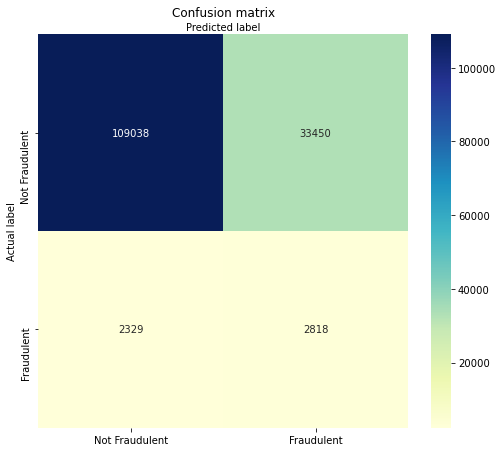

In [16]:
y_pred = nb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
%matplotlib inline
class_names=["Not Fraudulent", "Fraudulent"] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print(classification_report(y_test, y_pred))

<br>

### 2. Logistic Regression

<br>

In [17]:
lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 3) 
lr.fit(X_train, y_train)

KeyboardInterrupt: 

([<matplotlib.axis.YTick at 0x7fd6cb7cb9a0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

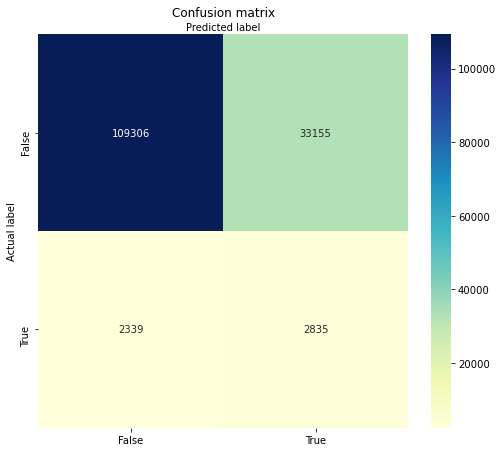

In [ ]:
y_pred = nb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
%matplotlib inline
class_names=["Not Fraudulent", "Fraudulent"] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print(classification_report(y_test, y_pred))

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
fig = plt.figure(figsize = (100, 5))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(importances)

<br>

### 3. Random Forest

<br>

In [75]:
rf =  RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', random_state = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=3)

([<matplotlib.axis.YTick at 0x7fd6cb4484c0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

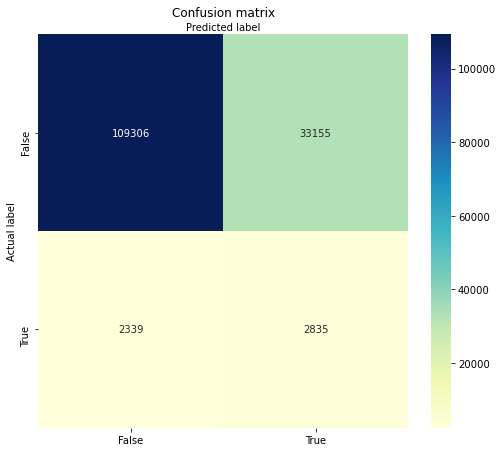

In [76]:
y_pred = nb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
%matplotlib inline
class_names=["Not Fraudulent", "Fraudulent"] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print(classification_report(y_test, y_pred))

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
fig = plt.figure(figsize = (100, 5))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(importances)

<br>

### 6. Support Vector Machine

<br>

In [78]:
sv = SVC()
sv.fit(X_train, y_train)


In [ ]:
y_pred = nb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print(classification_report(y_test, y_pred))

<br>

### 7. Gradient Boosted Decision Tree (XGBoost)

<br>

In [ ]:
weight = y_train.value_counts()[0]/y_train.value_counts()[1]

In [ ]:
xgboost =  XGBClassifier(scale_pos_weight = weight, objective='binary:logistic', eval_metric = 'auc', random_state = 3, tree_method = 'gpu_hist')
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=27.579586700866283,
              seed=None, silent=None, subsample=1, tree_method='gpu_hist',
              verbosity=1)

In [ ]:
y_pred = nb.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
%matplotlib inline
class_names=["Not Fraudulent", "Fraudulent"] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
print(classification_report(y_test, y_pred))

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': xgboost.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
fig = plt.figure(figsize = (100, 5))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(importances)